In [4]:
#Loading the data set
import pandas as pd
df = pd.read_excel('loan.xlsx')

#first 5 rows of the dataset
print(df.head())
print(df.info())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
# Basic data cleaning: Handling missing values

# Fill missing values in categorical columns with their most frequent value (mode)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values in numerical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())             # median for LoanAmount
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0]) # mode for Term
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])     # mode for Credit History

# Check if all missing values are handled
df.isnull().sum()


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [24]:
#Loading the data set
import pandas as pd
df = pd.read_excel('cleaned_loan_data_2.xlsx')

#first 5 rows of the dataset
print(df.head())
print(df.info())

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           0      Graduate            No   
1  LP001003   Male     Yes           1      Graduate            No   
2  LP001005   Male     Yes           0      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History Property_Area Loan_Status  
0               1         Urban           Y  
1               1         Rural           N  
2             

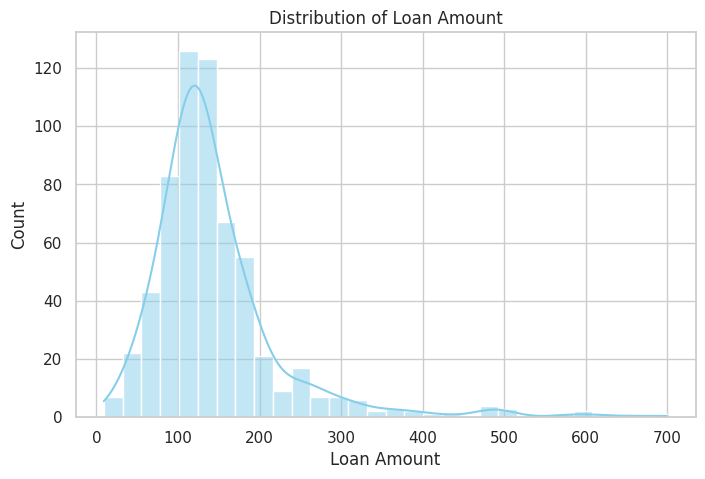

/tmp/ipython-input-9-1093038772.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='LoanAmount', data=df, palette='Set2', hue=None)


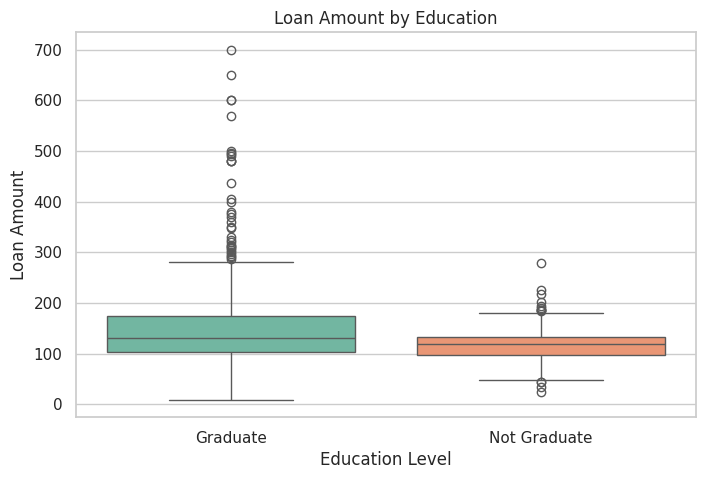

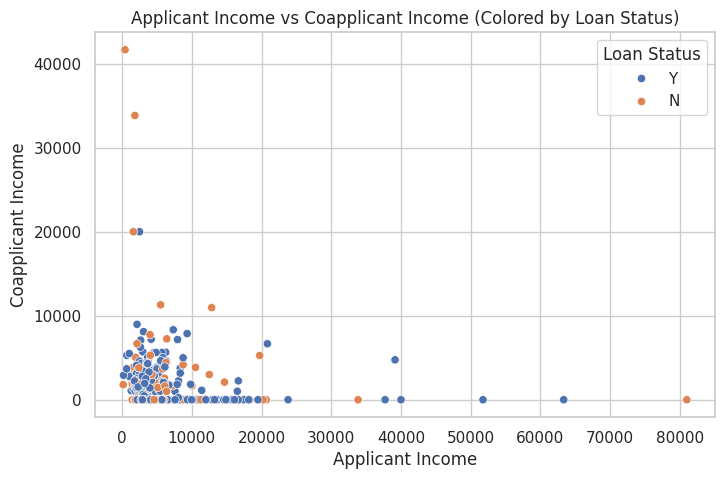

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Plot 1: Distribution of Loan Amount
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

# Plot 2: Loan Amount by Education
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='LoanAmount', data=df, palette='Set2', hue=None)
plt.title('Loan Amount by Education')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.show()

# Plot 3: Applicant Income vs Coapplicant Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status', data=df)
plt.title('Applicant Income vs Coapplicant Income (Colored by Loan Status)')
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.legend(title='Loan Status')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### ✅ Model Performance Summary

,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,78.86%,0.76,0.99,0.86
1,Decision Tree,69.11%,0.76,0.78,0.77


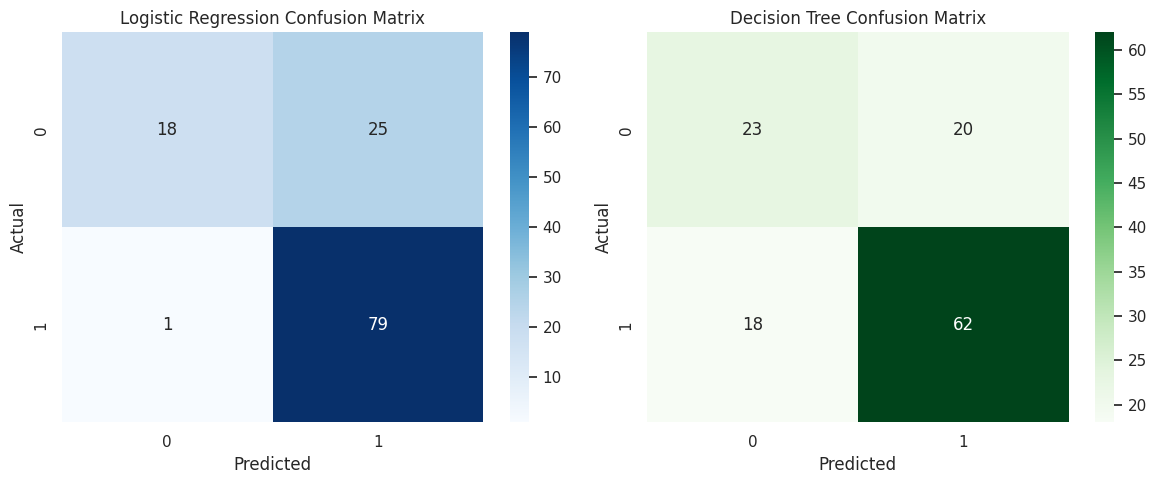

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, Markdown
import warnings

# Filter out specific FutureWarnings from seaborn and matplotlib
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="matplotlib")


# --- Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)
log_report_dict = classification_report(y_test, log_preds, output_dict=True)
log_cm = confusion_matrix(y_test, log_preds)

# --- Decision Tree ---
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)
tree_report_dict = classification_report(y_test, tree_preds, output_dict=True)
tree_cm = confusion_matrix(y_test, tree_preds)

# --- Display Model Accuracy ---
results_data = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [f'{log_acc:.2%}', f'{tree_acc:.2%}'],
    'Precision (Class 1)': [
        f"{log_report_dict['1']['precision']:.2f}",
        f"{tree_report_dict['1']['precision']:.2f}"
    ],
    'Recall (Class 1)': [
        f"{log_report_dict['1']['recall']:.2f}",
        f"{tree_report_dict['1']['recall']:.2f}"
    ],
    'F1-Score (Class 1)': [
        f"{log_report_dict['1']['f1-score']:.2f}",
        f"{tree_report_dict['1']['f1-score']:.2f}"
    ]
}
results_df = pd.DataFrame(results_data)
display(Markdown("### ✅ Model Performance Summary"))
display(results_df)

# --- Confusion Matrix Heatmaps ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Logistic Regression Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Decision Tree Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()